## Observations and Insights 
1. The sample of data including includes a broad range of mice sex, age, and weight.  That provide stable data with few outliers, and zero outliers for the best performing drug regimens.
2. Best performing drug regimens are Capomulin and Ramicane that have the lowest tumor volume and most consistent statistical results across respective sampling, outputting low variance, low standard deviation, and SEM
3. Taking a closer look at Capomulin, there is a low level of correlation between weight and tumor volume where the correlation coefficient is 0.53.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# # REFERENCE checking data to identify Mouse ID time duplicates
# study_results["Mouse ID"].nunique()
# mouse_metadata["Mouse ID"].nunique()
# mouse_metadata.info()
# mouse_metadata['Mouse ID'].describe()
# study_results['Mouse ID'].describe()

In [3]:
# # Remove Mouse ID with duplicate time points
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dropdup_sr = study_results.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False, inplace=False)

In [4]:
# # # REFERENCE checking data to identify Mouse ID time duplicates
# dropdup_sr.info()
# mouse_metadata.info()

In [5]:
# # MERGE / Combine the data into a single dataset

df = pd.merge(dropdup_sr, mouse_metadata, how='left', on='Mouse ID')

In [6]:
# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,Capomulin,Male,12,25
1879,u364,45,31.023923,3,Capomulin,Male,18,17
1880,p438,45,61.433892,1,Ceftamin,Female,11,26
1881,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [8]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
df["Mouse ID"].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_list = df['Drug Regimen'].unique()

In [10]:
drug_list

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename("Mean")
# drug_mean = drug_mean.rename("Mean")
drug_median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename("Median")
drug_var = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename("Variance")
drug_std = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename("Standard Deviation")
drug_sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename("Standard Error of the Mean")

In [12]:
# Assemble the resulting series into a single summary dataframe.
drug_regimen_summary = pd.merge(drug_mean, drug_median, how='left', on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, drug_var, how='left', on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, drug_std, how='left', on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, drug_sem, how='left', on="Drug Regimen")

In [13]:
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [15]:
# df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').describe()

In [16]:
# df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()

In [17]:
# df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()

In [18]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create an array that contains the number of users each language has
drug_list = df['Drug Regimen'].unique()
drug_list.sort()
x_axis = np.arange(len(drug_list))

drug_list

timepoint_count = df[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()

y_axis = list(timepoint_count['Timepoint'])

In [20]:
timepoint_count

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


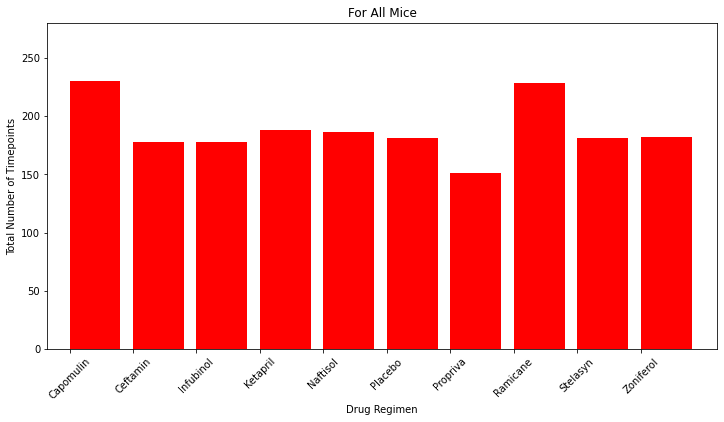

In [21]:
# # ------ Matplotlib's pyplot--------------
plt.figure(figsize=(12,6))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, y_axis, color='r', align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
plt.xticks(x_axis, drug_list, rotation=45)

# Sets the x limits of the current chart
plt.xlim(-0.35, len(x_axis)+0.20)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+50)

# Give our chart some labels and a tile
plt.title("For All Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints");

In [22]:
# # Lists
# drug_list
# y_axis

In [23]:
# # Zip two lists together into dataframe
timecount_df = pd.DataFrame(list(zip(drug_list, y_axis)), columns=['Drug Regimen', 'Timecount'])
timecount_df

,Drug Regimen,Timecount
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [24]:
# timecount_df.plot?

<AxesSubplot:xlabel='Drug Regimen'>

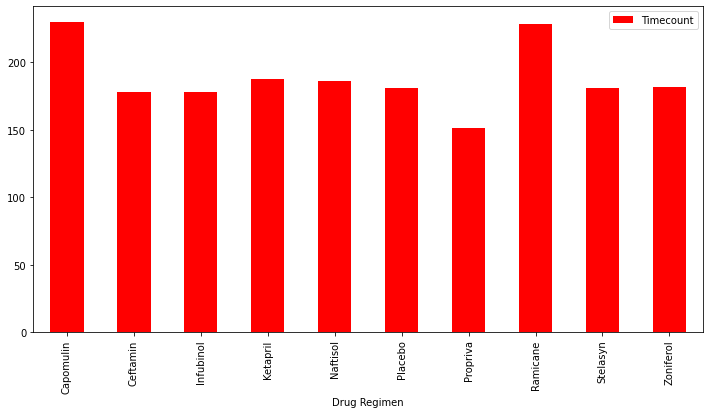

In [25]:
# # ------Pandas's DataFrame.plot()--------------
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timecount_df.plot.bar(x='Drug Regimen', y='Timecount', color='r', figsize=(12,6))


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [27]:
# #Create series for gender count
gender_s = df['Sex'].value_counts()
type(gender_s)
# gender_s

pandas.core.series.Series

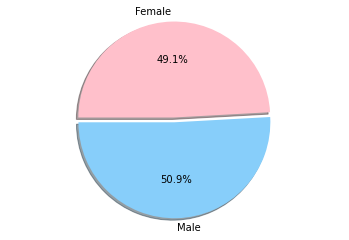

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# DATA SET 3
# #Make count of gender series to a list
gender_count = gender_s.tolist()
# #Make index or keys of series to a list
gender_type = gender_s.keys().tolist()

colors = ["lightskyblue", "pink"]
explode = (0, 0.05)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=gender_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal");


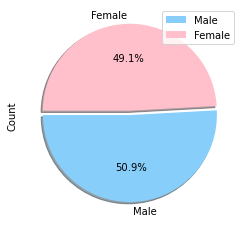

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# # Zip two lists together into dataframe
gender_df = pd.DataFrame(list(zip(gender_type, gender_count)), columns=['Sex', 'Count'])
# gender_df.info()

gender_df.plot.pie(y="Count", explode=explode, labels=gender_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180);

## Quartiles, Outliers and Boxplots

In [30]:
df.keys()

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_maxtp = df.groupby('Mouse ID')['Timepoint'].max()
mouse_maxtp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
m_df = pd.merge(df, mouse_maxtp, on="Mouse ID", how="left")

In [32]:
# # Rename columns
m_df.columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint']

In [33]:
# #using Loc on the logic test above only returns rows where the result is True
finaltumor_df = m_df.loc[m_df['Timepoint'] == m_df['Last Timepoint'], :]

finaltumor_df.columns = ['Mouse ID', 'Timepoint', 'Max Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint']


In [34]:
# # -----------------------------------------------------
# # PRINT FILTERED DATABASE FOR MAX TUMOR VOLUME BY MOUSE ID
# # -----------------------------------------------------

finaltumor_df

,Mouse ID,Timepoint,Max Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
20,x336,0,45.000000,0,Naftisol,Female,4,29,0
53,h428,0,45.000000,0,Ketapril,Female,1,27,0
55,v199,0,45.000000,0,Naftisol,Female,17,29,0
108,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,Capomulin,Male,12,25,45
1879,u364,45,31.023923,3,Capomulin,Male,18,17,45
1880,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1881,x773,45,58.634971,4,Placebo,Female,21,30,45


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
finaltumor_df['Drug Regimen'].unique()
pass_treatments=['Capomulin', 'Infubinol','Ramicane', 'Ceftamin']
fail_treatments=['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Propriva', 'Placebo']

In [36]:
# # MAX TUMOR VOLUME BY MOUSE ID
MID_tumor_max = finaltumor_df.groupby(["Mouse ID"])['Timepoint'].max()

In [37]:
# # CREATE LISTS MAX TUMOR VOLUME BY MOUSE ID AND DRUG REGIMEN
MID_tumor_max_list = MID_tumor_max.tolist()
DR_list = finaltumor_df['Drug Regimen'].tolist()
MID_list = finaltumor_df['Mouse ID'].tolist()

In [38]:
# # ZIP LISTS
MID_tumor_max_df=pd.DataFrame(list(zip(MID_list, DR_list, MID_tumor_max_list)), 
                                   columns = ['Mouse ID', 'Drug Regimen','Max Tumor Volume (mm3)'])

# # -----------------------------------------------------
# # PRINT MAX TUMOR VOLUME MAX BY MOUSE ID AND DRUG REGIMEN
# # -----------------------------------------------------
MID_tumor_max_df

,Mouse ID,Drug Regimen,Max Tumor Volume (mm3)
0,f932,Ketapril,45
1,x336,Naftisol,45
2,h428,Ketapril,45
3,v199,Naftisol,45
4,o848,Stelasyn,30
...,...,...,...
244,r944,Capomulin,10
245,u364,Capomulin,45
246,p438,Ceftamin,45
247,x773,Placebo,45


In [39]:
tumorMax_list = []
for x in pass_treatments:
    maxTumor = finaltumor_df.loc[finaltumor_df['Drug Regimen'] == x, 'Max Tumor Volume (mm3)'].max()
    tumorMax_list.append(maxTumor)

In [40]:
# # CREATE DATEFRAME FROM LISTS
regimen_stats_df = pd.DataFrame(tumorMax_list, pass_treatments)

In [41]:
# # NAME COLUMNS in DATEFRAME
regimen_stats_df.columns = [['Max Tumor Volume (mm3)']]

In [42]:
# # -----------------------------------------------------
# # PRINT MAX TUMOR VOLUME MAX BY DRUG REGIMEN
# # -----------------------------------------------------
regimen_stats_df

,Max Tumor Volume (mm3)
Capomulin,47.685963
Infubinol,72.226731
Ramicane,45.220869
Ceftamin,68.923185


In [43]:
# finaltumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()

In [44]:
# # Drop rows for non-promising treatments
pass_treatments=['Capomulin', 'Infubinol','Ramicane', 'Ceftamin']

pass_treatments_df = finaltumor_df[(finaltumor_df['Drug Regimen'].isin(pass_treatments))]

pass_treatments_df

,Mouse ID,Timepoint,Max Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
180,u153,0,45.000000,0,Ceftamin,Female,11,25,0
192,b447,0,45.000000,0,Ceftamin,Male,2,30,0
215,x226,0,45.000000,0,Ceftamin,Male,23,28,0
220,t573,0,45.000000,0,Ceftamin,Female,15,27,0
416,c326,5,36.321346,0,Infubinol,Female,18,25,5
...,...,...,...,...,...,...,...,...,...
1869,a644,45,32.978522,1,Ramicane,Female,7,17,45
1875,i177,45,33.562402,3,Ramicane,Male,10,18,45
1878,r944,45,41.581521,2,Capomulin,Male,12,25,45
1879,u364,45,31.023923,3,Capomulin,Male,18,17,45


In [45]:
# Determine if there are any potential outliers in the FINAL TUMOR VOLUME
# # -------FINAL TUMOR VOLUME------------
# # -----------------------------------
pass_treatments_df['Max Tumor Volume (mm3)']
quartiles = pass_treatments_df['Max Tumor Volume (mm3)'].quantile([.25,.5,.75])
# quartiles = df_avgoccup.quantile([.25,.5,.75])
quartiles

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Max Tumor Volume (mm3), dtype: float64

In [46]:
# #Convert Datfarm to Series
# #quartiles = quartiles.iloc[0].squeeze()
# quartiles_s=quartiles['Max Tumor Volume (mm3)'].squeeze()

In [47]:
lowerq=quartiles[0.25]

upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Max Tumor Volume is: {lowerq}")
print(f"The upper quartile of Max Tumor Volume is: {upperq}")
print(f"The interquartile range of Max Tumor Volume  is: {iqr}")
print(f"The the median of Max Tumor Volume  is: {quartiles[0.5]} ")

The lower quartile of Max Tumor Volume is: 37.1877438025
The upper quartile of Max Tumor Volume is: 59.930261755
The interquartile range of Max Tumor Volume  is: 22.742517952499995
The the median of Max Tumor Volume  is: 45.0 


In [48]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [49]:
outliers_df = finaltumor_df[(finaltumor_df['Max Tumor Volume (mm3)'] < lower_bound) |
                           (finaltumor_df['Max Tumor Volume (mm3)'] > upper_bound)]                 
if outliers_df.empty:
    print(print(f"No Max Tumor Values outliers."))
else:
    outliers_df



No Max Tumor Values outliers.
None


In [59]:
# # Drop rows for non-promising treatments



In [60]:
# CREATE LISTS of Pass Treatments
Row_list = []
for x in pass_treatments:
    my_list = pass_treatments_df.loc[pass_treatments_df['Drug Regimen'] == x, 'Max Tumor Volume (mm3)']
    Row_list.append(my_list)

# # ?????????????????????????????????????????????????
# # TRYING TO LOOP TO CREATE LISTS BUT COULD NOT MAKE IT WORK
# # ?????????????????????????????????????????????????
# Row_list_ln = np.arange(len(Row_list))

# for var, q in zip(pass_treatments, Row_list_ln):
#     var = Row_list[q].tolist()

# add subset

# Generate a box plot of the FINAL TUMOR VOLUME of each mouse across four regimens of interest
# Outlier plot of FINAL TUMOR DATA VOLUME

Capomulin_list = Row_list[0].tolist()
Infubinol_list = Row_list[1].tolist()
Ramicane_list = Row_list[2].tolist()
Ceftamin_list = Row_list[3].tolist()

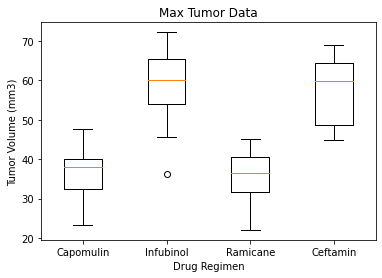

In [62]:
xlabels = ["Capomulin", "Infubinol", "Ramicane", "Ceftamin"]
x_axis = np.arange(len(xlabels))

fig1, ax1 = plt.subplots()
ax1.set_title('Max Tumor Data')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")


# # #=====BROKEN==========BROKEN=====================================
# # #================================================================
# DF = pd.DataFrame({"Capomulin": Capomulin_list, "Infubinol": Infubinol_list,
#                    "Ramicane": Ramicane_list, "Ceftamin": Ceftamin_list})

# ax1 = DF[["Capomulin_list", "Infubinol_list", "Ramicane_list", "Ceftamin_list"]].plot(kind='box', title='boxplot', showmeans=True)
# # #================================================================

# ax1.boxplot(Capomulin_list)
# ax1.boxplot(Infubinol_list)
# ax1.boxplot(Ramicane_list)
# ax1.boxplot(Ceftamin_list)

ax1.boxplot([Capomulin_list, Infubinol_list, Ramicane_list, Ceftamin_list])
plt.xticks(x_axis + 1, xlabels)

# # #====BROKEN===========X-AXIS NAMING LABELS===================================
# ax1.xticks=([0, 1, 2, 3]["Capomulin", "Infubinol", "Ramicane", "Ceftamin"])

plt.show()

In [63]:
# Determine if there are any potential outliers in the ALL TUMOR DATA VOLUME
# # -------ALL TUMOR DATA VOLUME------------
# # -----------------------------------

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# quartiles = df_avgoccup.quantile([.25,.5,.75])
quartiles
    

0.25    45.000000
0.50    48.951368
0.75    56.346321
Name: Tumor Volume (mm3), dtype: float64

In [64]:
# #Convert Datfarm to Series
# #quartiles = quartiles.iloc[0].squeeze()
# quartiles_s=quartiles['Max Tumor Volume (mm3)'].squeeze()

In [65]:
lowerq=quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)  is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]}")

The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 56.34632118
The interquartile range of Tumor Volume (mm3)  is: 11.346321179999997
The the median of Tumor Volume (mm3) is: 48.95136773


In [66]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 27.980518230000005 could be outliers.
Values above 73.36580294999999 could be outliers.


In [67]:
outliers_df = df[(df['Tumor Volume (mm3)'] < lower_bound) |
                           (df['Tumor Volume (mm3)'] > upper_bound)]                 
if outliers_df.empty:
    print(print(f"No Tumor Volume (mm3) outliers."))
else:
    outliers_df

In [68]:
# Determine outliers using upper and lower bounds

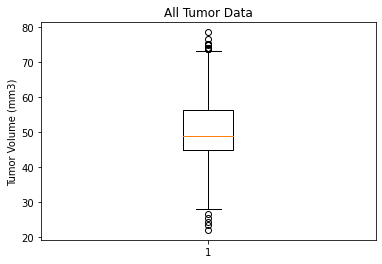

In [69]:
# Create empty list to fill with tumor vol data (for plotting)
tumer_vol_list=df['Tumor Volume (mm3)'].tolist()

# Outlier plot of ALL TUMOR DATA VOLUME
fig1, ax1 = plt.subplots()
ax1.set_title('All Tumor Data')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumer_vol_list)
plt.show()

## Line and Scatter Plots

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df.query

<bound method DataFrame.query of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1878     r944         45           41.581521                 2    Capomulin   
1879     u364         45           31.023923                 3    Capomulin   
1880     p438         45           61.433892                 1     Ceftamin   
1881     x773         45           58.634971                 4      Placebo   
1882     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_

In [71]:
capomulin_df = df.loc[df['Drug Regimen'] == 'Capomulin', :]

In [72]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
# # Selecting mouse with many data points 'b128'
# # count timepoints for Mouse ID and Capolin Drug Regimen
# capomulin_df[['Mouse ID', 'Timepoint']].groupby('Mouse ID').count()

b128_df = df.loc[df['Mouse ID'] == 'b128', :]

x_lbl= b128_df['Timepoint'].tolist()
y_lbl = b128_df['Tumor Volume (mm3)'].tolist()

# # Zip list together
line_df = pd.DataFrame(list(zip(x_lbl, y_lbl)), columns=['Timepoint', 'Tumor Volume (mm3)'])


x_axis = np.arange(len(x_lbl))

In [73]:
line_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.651331
2,10,43.270852
3,15,43.784893
4,20,42.731552
5,25,43.262145
6,30,40.605335
7,35,37.967644
8,40,38.379726
9,45,38.982878


In [74]:
line_df.set_index('Timepoint')

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,45.651331
10,43.270852
15,43.784893
20,42.731552
25,43.262145
30,40.605335
35,37.967644
40,38.379726


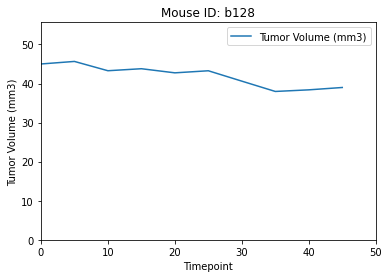

In [85]:
line_df.plot.line(x='Timepoint', y="Tumor Volume (mm3)")

# Sets the x limits of the current chart
plt.xlim(0, max(x_lbl)+5)

# Sets the y limits of the current chart
plt.ylim(0, max(y_lbl)+10)

# Give our chart some labels and a tile
plt.title("Mouse ID: b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)");

In [88]:
capomulin_df.keys()

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Created new column for fun...
capomulin_df['Tumor Volume vs Mouse Weight'] = capomulin_df['Tumor Volume (mm3)'] / capomulin_df['Weight (g)']
capomulin_df

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# The maximum x value for our chart will be 100
x_limit = 55

# List of values from 0 to 100 each value being 1 greater than the last
x_axe = capomulin_df['Tumor Volume (mm3)'].tolist()
y_axe = capomulin_df['Weight (g)'].tolist()

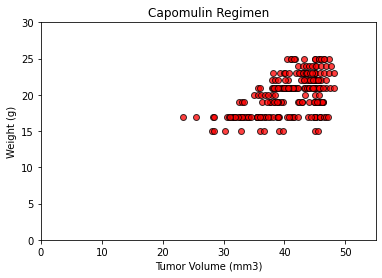

In [112]:
plt.scatter(x_axe, y_axe, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0,30)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0, 55)

# Give our chart some labels and a tile
plt.title("Capomulin Regimen")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

# Prints the scatter plot to the screen
plt.show()


## Correlation and Regression

In [116]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df.keys()

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Tumor Volume vs Mouse Weight'],
      dtype='object')

In [136]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
from scipy.stats import linregress
from sklearn import datasets

xval = capomulin_df.iloc[:,7]
yval = capomulin_df.iloc[:,2]

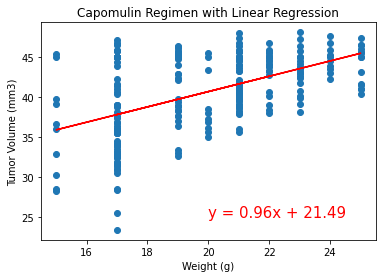

In [142]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regress_values = capomulin_df.iloc[:,7] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_df.iloc[:,7],capomulin_df.iloc[:,2])
plt.plot(xval,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Capomulin Regimen with Linear Regression")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [134]:
# Calculate the correlation coefficient between Weight and Tumor Vol
weight = capomulin_df.iloc[:,7]
tumor_vol =capomulin_df.iloc[:,2]
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight,tumor_vol)[0],2)}")

The correlation coefficient between weight and tumor volume is 0.53
